# Comparison of five network designs

In [18]:
# Import standard libraries
from importlib import reload
import csv
import OmicsIntegrator as oi
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tqdm
import time
from upsetplot import from_contents, UpSet
from sklearn.cluster import AgglomerativeClustering
from IPython.display import Image
from IPython.core.display import SVG
import gseapy
from gseapy.plot import barplot, dotplot
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import random
import itertools

# Import custom libraries
import pcst_utils_6 as pcst
import neighborhoods as nbh

In [56]:
# Reload modules in case of modifications
reload(pcst)
reload(nbh)

<module 'neighborhoods' from '/home/braunger/masterthesis/python_code/PCST/neighborhoods.py'>

In [128]:
# File paths
data_dir = "/home/braunger/masterthesis/data/"
save_dir = "/home/braunger/masterthesis/save/pcst/"
tf_dir = "/home/braunger/masterthesis/save/TF_targets/"
fig_dir = "/home/braunger/masterthesis/save/figures/pcst/"

# Design 1

In [5]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 1)
steps = ["1-15_16-26_27-60", "16-26_27-60_61-85", "27-60_61-85_86-96"]
net_stats_d1, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps,
                                                 TFs_with_targets = True, design = 1)

net_stats_d1.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,644,7086,313,94.561934,331,307,59,7
16-26_27-60_61-85,608,6281,306,96.226415,302,307,69,1
27-60_61-85_86-96,607,7446,321,95.820896,286,337,64,5


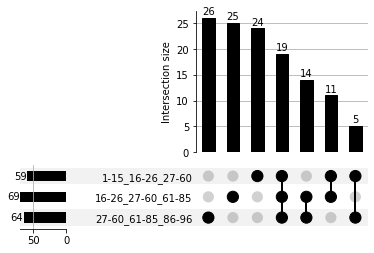

In [6]:
incl_TFs_1 = [[tf[:-4] for tf in net_stats_d1.iloc[net, 9]] for net in range(3)]
shared_TFs_design1 = set.intersection(*map(set,incl_TFs_1))
intersections = from_contents({steps[2]: incl_TFs_1[2], 
                               steps[1]: incl_TFs_1[1],
                               steps[0]: incl_TFs_1[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design1.png')

# Design 2

In [7]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
net_stats_d2, target_counts_d2 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 2)

net_stats_d2.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,732,8490,397,94.299287,335,343,62,7
16-26_27-60_61-85,684,7777,369,96.344648,315,335,83,2
27-60_61-85_86-96,607,7446,321,95.820896,286,337,64,5


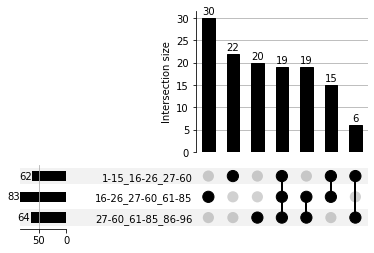

In [8]:
incl_TFs_2 = [[tf[:-4] for tf in net_stats_d2.iloc[net, 9]] for net in range(3)]
shared_TFs_design2 = set.intersection(*map(set,incl_TFs_2))
intersections = from_contents({steps[2]: incl_TFs_2[2], 
                               steps[1]: incl_TFs_2[1],
                               steps[0]: incl_TFs_2[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design2.png')

In [22]:
# save incl TFs as dataframe
incl_TFs_df = pd.DataFrame({'TF': list(itertools.chain(*incl_TFs_2)), 
                            'net': list(itertools.chain(*[['young_net'] * len(incl_TFs_2[0]), 
                                                          ['middle_net'] * len(incl_TFs_2[1]), 
                                                          ['old_net'] * len(incl_TFs_2[2])]))})
incl_TFs_df.to_csv(save_dir + 'incl_TFs_design2.csv', index = False)

# Design 3

In [8]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 3)
net_stats_d3, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 3)

net_stats_d3.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,742,9033,408,97.142857,334,342,61,7
16-26_27-60_61-85,686,8565,372,97.382199,314,332,82,2
27-60_61-85_86-96,612,8081,327,97.611940,285,337,63,5


In [9]:
# Why do the networks in design 3 sometimes contain more TFs than in design 2? 

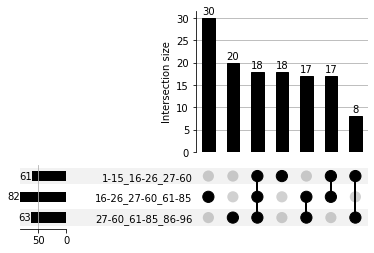

In [10]:
incl_TFs_3 = [[tf[:-4] for tf in net_stats_d3.iloc[net, 9]] for net in range(3)]
shared_TFs_design3 = set.intersection(*map(set,incl_TFs_3))
intersections = from_contents({steps[2]: incl_TFs_3[2], 
                               steps[1]: incl_TFs_3[1],
                               steps[0]: incl_TFs_3[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design3.png')

# Design 4

In [11]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 4)
net_stats_d4, target_counts_d4 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 4)

net_stats_d4.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,790,9838,427,98.842593,363,379,68,7
16-26_27-60_61-85,712,9204,374,97.905759,338,367,98,3
27-60_61-85_86-96,612,8081,327,97.611940,285,337,63,5


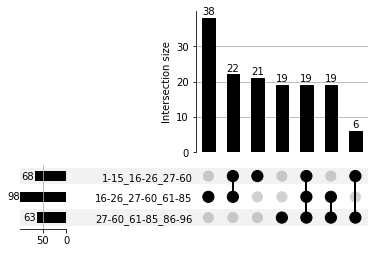

In [12]:
incl_TFs_4 = [[tf[:-4] for tf in net_stats_d4.iloc[net, 9]] for net in range(3)]
shared_TFs_design4 = set.intersection(*map(set,incl_TFs_4))
intersections = from_contents({steps[2]: incl_TFs_4[2], 
                               steps[1]: incl_TFs_4[1],
                               steps[0]: incl_TFs_4[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design4.png')

# Design 5

In [13]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 5)
net_stats_d5, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 5)

net_stats_d5.iloc[:, 0:8]

,n_nodes,n_edges,n_incl_terminals,percent_incl_terminals,n_Steiner_nodes,n_TFs,n_incl_TFs,n_prized_TFs
1-15_16-26_27-60,1013,17288,668,99.552906,345,377,76,7
16-26_27-60_61-85,938,18125,598,99.170813,340,367,112,3
27-60_61-85_86-96,612,8081,327,97.611940,285,337,63,5


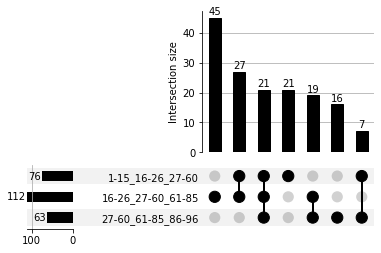

In [14]:
incl_TFs_5 = [[tf[:-4] for tf in net_stats_d5.iloc[net, 9]] for net in range(3)]
shared_TFs_design5 = set.intersection(*map(set,incl_TFs_5))
intersections = from_contents({steps[2]: incl_TFs_5[2], 
                               steps[1]: incl_TFs_5[1],
                               steps[0]: incl_TFs_5[0]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2, sort_categories_by=None).plot()

plt.savefig(fig_dir+'intersections_design5.png')

# Comparison of the five designs

## TFs shared between all networks

In [15]:
# Numbers of TFs per design
pd.concat([net_stats_d1['n_incl_TFs'].rename("design_1"), 
          net_stats_d2['n_incl_TFs'].rename("design_2"), 
          net_stats_d3['n_incl_TFs'].rename("design_3"),
          net_stats_d4['n_incl_TFs'].rename("design_4"),
          net_stats_d5['n_incl_TFs'].rename("design_5")], axis = 1)

,design_1,design_2,design_3,design_4,design_5
1-15_16-26_27-60,59,62,61,68,76
16-26_27-60_61-85,69,83,82,98,112
27-60_61-85_86-96,64,64,63,63,63


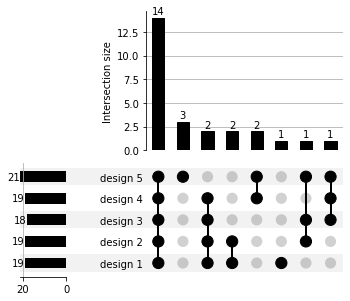

In [16]:
# How strongly do the TFs that occur in all 3 networks overlap?
intersections = from_contents({'design 1': shared_TFs_design1, 
                               'design 2': shared_TFs_design2,
                               'design 3': shared_TFs_design3,
                               'design 4': shared_TFs_design4,
                               'design 5': shared_TFs_design5})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'intersections_all-designs.png')

In [17]:
set.intersection(shared_TFs_design1, 
                 shared_TFs_design2,
                 shared_TFs_design3,
                 shared_TFs_design4, 
                 shared_TFs_design5)

{'AHR',
 'FOXO3',
 'GATA4',
 'GTF2B',
 'HIF1A',
 'MAFF',
 'MAZ',
 'NOTCH1',
 'NR2C2',
 'SRC',
 'STAT1',
 'STAT3',
 'TCF7L2',
 'TEAD4'}

## Young-specific TFs

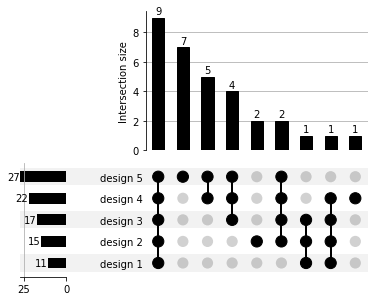

In [18]:
def young_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[:2])).difference(set(incl_TFs[2]))

intersections = from_contents({'design 1': young_specific_TFs(incl_TFs_1), 
                               'design 2': young_specific_TFs(incl_TFs_2),
                               'design 3': young_specific_TFs(incl_TFs_3),
                               'design 4': young_specific_TFs(incl_TFs_4),
                               'design 5': young_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'young_specific_TFs.png')

In [19]:
set.intersection(young_specific_TFs(incl_TFs_1), 
                 young_specific_TFs(incl_TFs_2),
                 young_specific_TFs(incl_TFs_3),
                 young_specific_TFs(incl_TFs_4), 
                 young_specific_TFs(incl_TFs_5))

{'ASCL1', 'CREBBP', 'ERG', 'FOXA1', 'RELA', 'SMAD3', 'SPIB', 'TP73', 'ZNF263'}

## Old-specific TFs

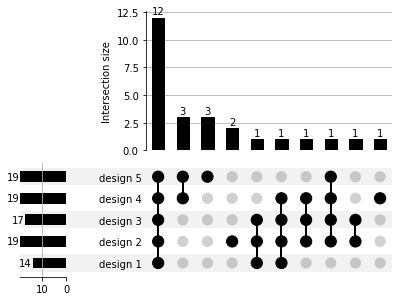

In [20]:
def old_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[1:3])).difference(set(incl_TFs[0]))

intersections = from_contents({'design 1': old_specific_TFs(incl_TFs_1), 
                               'design 2': old_specific_TFs(incl_TFs_2),
                               'design 3': old_specific_TFs(incl_TFs_3),
                               'design 4': old_specific_TFs(incl_TFs_4),
                               'design 5': old_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'old_specific_TFs.png')

In [21]:
set.intersection(old_specific_TFs(incl_TFs_1), 
                 old_specific_TFs(incl_TFs_2),
                 old_specific_TFs(incl_TFs_3),
                 old_specific_TFs(incl_TFs_4), 
                 old_specific_TFs(incl_TFs_5))

{'ASCL2',
 'CDK9',
 'CEBPA',
 'CTCF',
 'E2F1',
 'EHF',
 'GRHL3',
 'KDM1A',
 'KLF1',
 'NCOR1',
 'POLR2A',
 'SIX5'}

## TFs in the first network

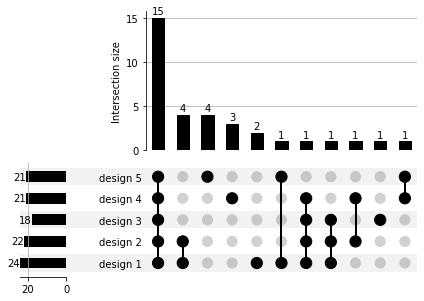

In [22]:
def first_net_TFs(incl_TFs):
    return set(incl_TFs[0]).difference(set.union(*map(set,[incl_TFs[i] for i in [1, 2]])))

intersections = from_contents({'design 1': first_net_TFs(incl_TFs_1), 
                               'design 2': first_net_TFs(incl_TFs_2),
                               'design 3': first_net_TFs(incl_TFs_3),
                               'design 4': first_net_TFs(incl_TFs_4),
                               'design 5': first_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'first_net_TFs.png')

In [23]:
set.intersection(first_net_TFs(incl_TFs_1), 
                 first_net_TFs(incl_TFs_2),
                 first_net_TFs(incl_TFs_3),
                 first_net_TFs(incl_TFs_4), 
                 first_net_TFs(incl_TFs_5))

{'CDK7',
 'CTNNB1',
 'EP300',
 'FOXA2',
 'GLI2',
 'GLYR1',
 'HOXA13',
 'MEIS1',
 'MYBL2',
 'NR5A2',
 'PGR',
 'PML',
 'RNF2',
 'STAT5A',
 'TFAP2C'}

## TFs in the second network

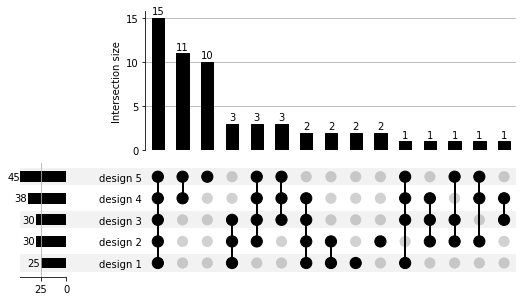

In [24]:
def second_net_TFs(incl_TFs):
    return set(incl_TFs[1]).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 2]])))

intersections = from_contents({'design 1': second_net_TFs(incl_TFs_1), 
                               'design 2': second_net_TFs(incl_TFs_2),
                               'design 3': second_net_TFs(incl_TFs_3),
                               'design 4': second_net_TFs(incl_TFs_4),
                               'design 5': second_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'second_net_TFs.png')

In [25]:
set.intersection(second_net_TFs(incl_TFs_1), 
                 second_net_TFs(incl_TFs_2),
                 second_net_TFs(incl_TFs_3),
                 second_net_TFs(incl_TFs_4), 
                 second_net_TFs(incl_TFs_5))

{'AR',
 'CHD4',
 'ELK3',
 'ESR1',
 'FOXP2',
 'NFYC',
 'OTX2',
 'RXRA',
 'STAT5B',
 'WDR5',
 'ZBTB33',
 'ZEB1',
 'ZFX',
 'ZNF76',
 'ZNF83'}

## TFs in the last network

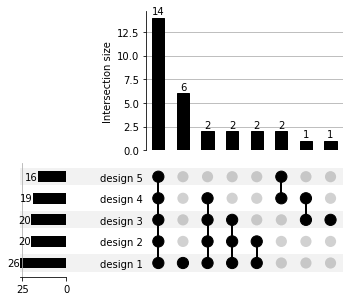

In [26]:
def last_net_TFs(incl_TFs):
    return set(incl_TFs[2]).difference(set.union(*map(set,incl_TFs[0:2])))

intersections = from_contents({'design 1': last_net_TFs(incl_TFs_1), 
                               'design 2': last_net_TFs(incl_TFs_2),
                               'design 3': last_net_TFs(incl_TFs_3),
                               'design 4': last_net_TFs(incl_TFs_4),
                               'design 5': last_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1, sort_categories_by=None).plot()
plt.savefig(fig_dir+'last_net_TFs.png')

In [27]:
set.intersection(last_net_TFs(incl_TFs_1), 
                 last_net_TFs(incl_TFs_2),
                 last_net_TFs(incl_TFs_3),
                 last_net_TFs(incl_TFs_4), 
                 last_net_TFs(incl_TFs_5))

{'ARNT',
 'ATRX',
 'BMI1',
 'CLOCK',
 'DDX5',
 'FOS',
 'MBD3',
 'MYH11',
 'NFIC',
 'PBX1',
 'RBBP5',
 'SMAD2',
 'SMARCA4',
 'TAF3'}

## Save DE targets of network-specific TFs

In [28]:
# get DE targets for last net TFs
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)

neighborhood_set_old = set()
for TF in last_net_TFs(incl_TFs_2):
    TF = TF + '_tr0'
    for node in net_dict['200.allTFs.27-60_61-85_86-96'].neighbors(TF):
        if node.endswith("_tr1"):
            neighborhood_set_old = neighborhood_set_old.union(set({node}))
            
# get DE targets for second net TFs
neighborhood_set_middle = set()
for TF in second_net_TFs(incl_TFs_2):
    TF = TF + '_tr0'
    for node in net_dict['200.allTFs.16-26_27-60_61-85'].neighbors(TF):
        if node.endswith("_tr1"):
            neighborhood_set_middle = neighborhood_set_middle.union(set({node}))
            
# get DE targets for first net TFs
neighborhood_set_young = set()
for TF in first_net_TFs(incl_TFs_2):
    TF = TF + '_tr0'
    for node in net_dict['200.allTFs.1-15_16-26_27-60'].neighbors(TF):
        if node.endswith("_tr1"):
            neighborhood_set_young = neighborhood_set_young.union(set({node}))

DE_targets = pd.concat([pd.DataFrame({'targets': [TF[:-4] for TF in list(neighborhood_set_old)], 
                                     'net': "old"}),
                       pd.DataFrame({'targets': [TF[:-4] for TF in list(neighborhood_set_middle)], 
                                     'net': "middle"}),
                       pd.DataFrame({'targets': [TF[:-4] for TF in list(neighborhood_set_young)], 
                                     'net': "young"})]
                      )     
DE_targets.to_csv(save_dir + "DE_targets.csv", index = False)
DE_targets.head()

,targets,net
0,FAM83G,old
1,GINS4,old
2,C1orf159,old
3,SIVA1,old
4,HIC1,old


In [29]:
# Save all DE genes on the right side of each network
DE_young = [node[:-4] for node in net_dict['200.allTFs.1-15_16-26_27-60'].nodes() if node.endswith("_tr1")]
DE_middle = [node[:-4] for node in net_dict['200.allTFs.16-26_27-60_61-85'].nodes() if node.endswith("_tr1")]
DE_old = [node[:-4] for node in net_dict['200.allTFs.27-60_61-85_86-96'].nodes() if node.endswith("_tr1")]

DE_genes = pd.concat([pd.DataFrame({'targets': DE_young, 'net': "young"}),
                     pd.DataFrame({'targets': DE_middle, 'net': "middle"}),
                     pd.DataFrame({'targets': DE_old, 'net': "old"})])
DE_genes.to_csv(save_dir + "DE_genes.csv", index = False)
DE_genes.head()

,targets,net
0,SCAMP3,young
1,LYL1,young
2,PPARGC1A,young
3,CHD4,young
4,FGF18,young


# Design 2: Analyses of the TFs that occur in all 3 networks

## Percentage of differentially expressed genes that are targeted

In [30]:
# Get number of DE targets for the TFs in each of the networks
shared_TFs = set.intersection(*map(set,incl_TFs_2))
targets_shared_TFs = pd.DataFrame(index = shared_TFs)

for index, (name, df) in enumerate(target_counts_d2.items()):
    df.index = df.index.str.replace("_tr0", "")
    if index == 0: 
        df = df[['percent_genome_targets', 'percent_DE_targeted']]
        df.columns = ['percent_genome_targets', name]
    else:
        df = df[['percent_DE_targeted']]
        df.columns = [name]
    targets_shared_TFs = targets_shared_TFs.join(df)

targets_shared_TFs = targets_shared_TFs.loc[(targets_shared_TFs.iloc[:, 1:]!=0).any(axis=1)]    
targets_percent = targets_shared_TFs.iloc[:,1:].div(targets_shared_TFs.percent_genome_targets, axis=0)
targets_shared_TFs.head()

,percent_genome_targets,1-15_16-26_27-60,16-26_27-60_61-85,27-60_61-85_86-96
FLI1,0.650131,0.784141,0.712264,0.892216
NOTCH1,0.351719,0.409692,0.377358,0.586826
KAT5,0.072291,0.079295,0.080189,0.173653
TCF7L2,0.014850,0.026432,0.018868,0.011976
BACH2,0.052654,0.088106,0.070755,0.083832


## TF correlations 

<Figure size 432x288 with 0 Axes>

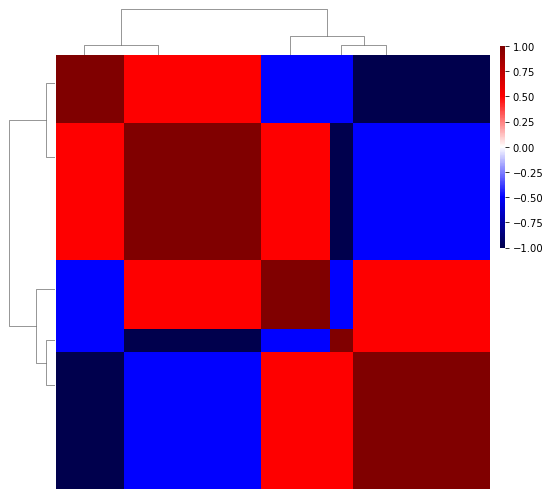

In [31]:
# Correlation between the TFs
corr_TFs = targets_shared_TFs.iloc[:, 1:].T.corr(method = "spearman")
plt.figure()
sns.clustermap(corr_TFs,
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap.png')
plt.show()

## Analyses of the clusters

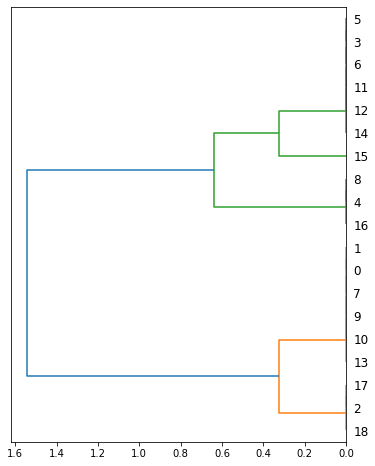

In [32]:
dend = linkage(corr_TFs, 
               method='average', metric='cosine')
plt.figure(figsize = (6, 8))
dendrogram(dend, orientation = "left", color_threshold = 1)
plt.savefig(fig_dir+'dendrogram.png')
plt.show()

In [33]:
TF_clusters = pd.DataFrame({'TF': corr_TFs.index, 
                            'cluster': fcluster(dend, 1, criterion = 'distance')})
cluster_counts = pd.DataFrame(TF_clusters['cluster'].value_counts()).reset_index()#.sort_values(by = 'index')
cluster_counts.columns = ['cluster', 'number_of_TFs']
cluster_counts

,cluster,number_of_TFs
0,2,10
1,1,9


In [34]:
targets_percent.reset_index(inplace=True)

### Plot trajectories

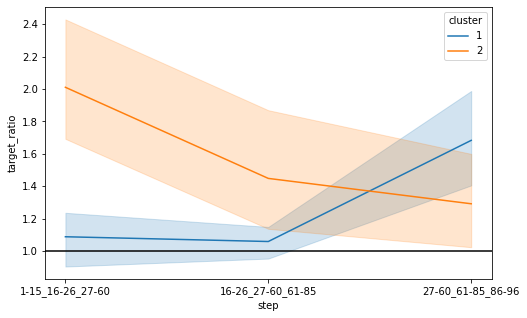

In [35]:
# plot trajectory of the number of targets in the clusters
targets_long = pd.melt(targets_percent, id_vars = ['index'],
       var_name='step', value_name = 'target_ratio')
targets_long.columns = ['TF', 'step', 'target_ratio']
targets_long = targets_long.merge(TF_clusters)
targets_long['cluster'] = targets_long['cluster'].astype(str)

plt.figure(figsize = (8, 5))
graph = sns.lineplot(data=targets_long,
             x='step', y='target_ratio',
             hue="cluster")
graph.axhline(1, color='black')
plt.savefig(fig_dir+'trajectories_cluster.png')
plt.show()

### Create network

In [36]:
# Create network
# Threshold correlation matrix
corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.6] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']
corr_long

network = nx.from_pandas_edgelist(corr_long, 'protein1', 'protein2', 'corr')
# add clusters as node attributes
clusters = {TF: TF_clusters.loc[TF_clusters['TF'] == TF, 'cluster'].tolist() for TF in list(network.nodes())}
nx.set_node_attributes(network, clusters, name='cluster')
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "TF_corr_0.6.html")

PosixPath('/home/braunger/masterthesis/save/pcst/TF_corr_0.6.html')

In [37]:
# network image created from the interactive html file
#SVG(fig_dir+"net_DESeq_5%.svg")

In [38]:
# Create subnetworks for each cluster
pcst.create_subnet(1, corr_long, TF_clusters, data_dir, save_dir, 0.8)
pcst.create_subnet(2, corr_long, TF_clusters, data_dir, save_dir, 0.8)

## GSEA on targets of selected TFs

39 out of 1621 targets are differentially expressed.


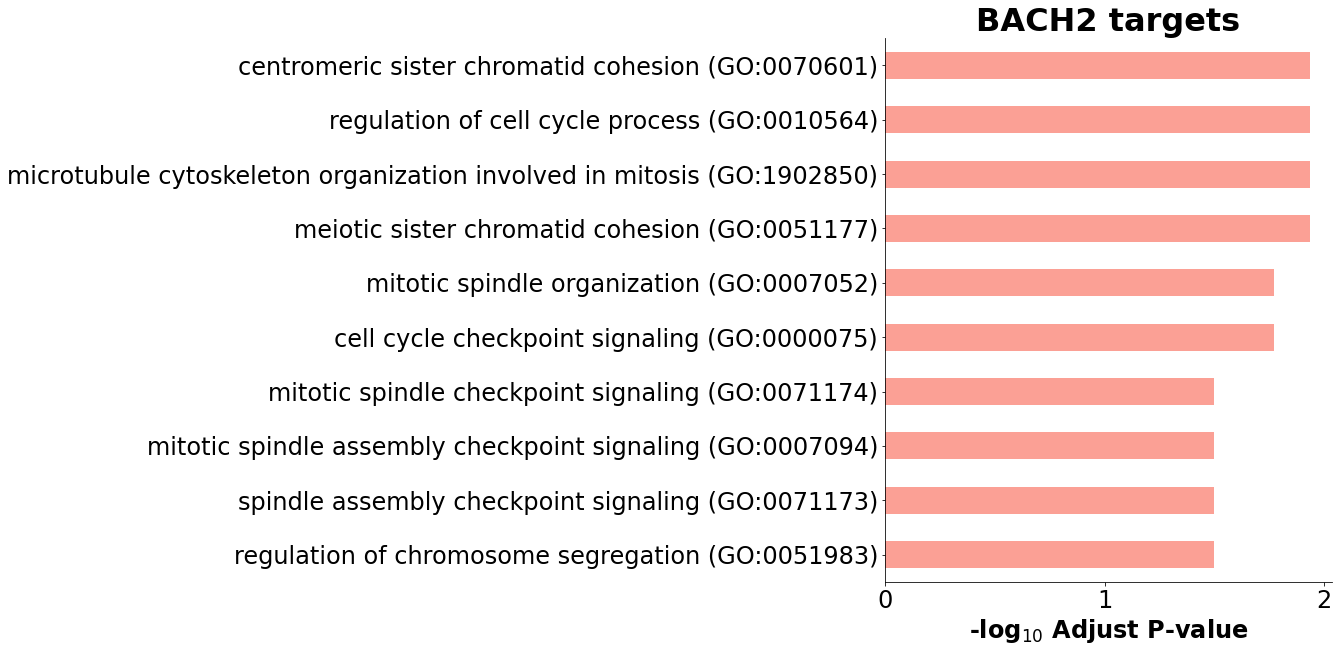

In [59]:
pcst.GSEA_DE_targets('BACH2', data_dir)

52 out of 2073 targets are differentially expressed.


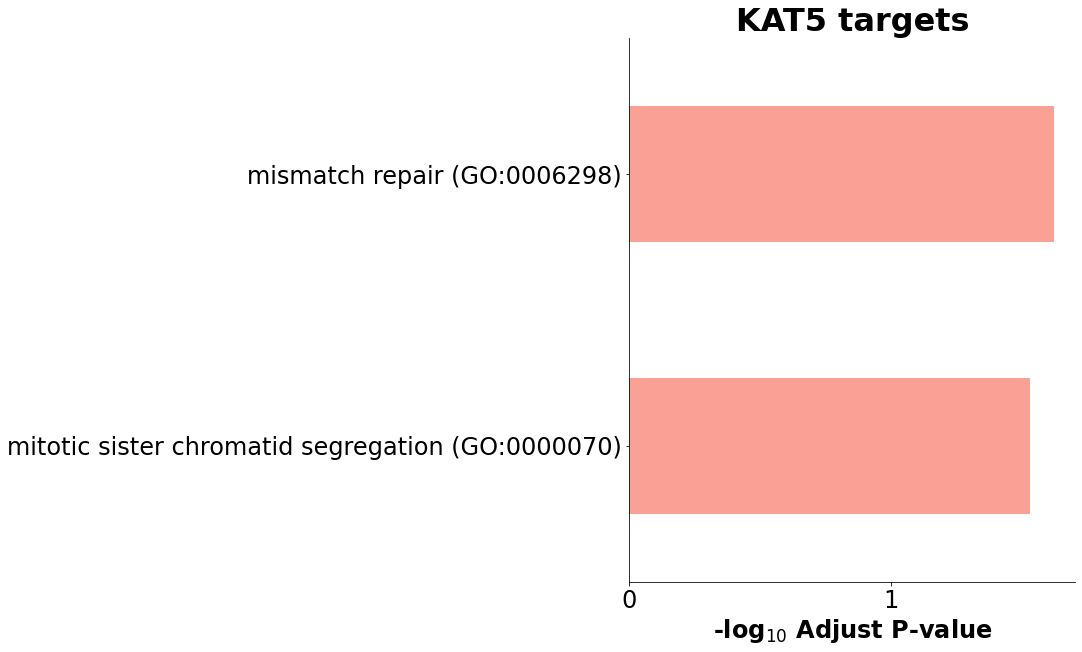

In [60]:
pcst.GSEA_DE_targets('KAT5', data_dir)

In [69]:
names = gseapy.get_library_name() 
#names[:100]
# Aging_Perturbations_from_GEO_down, GTEx_Aging_Signatures_2021

# Intersections of the Steiner nodes

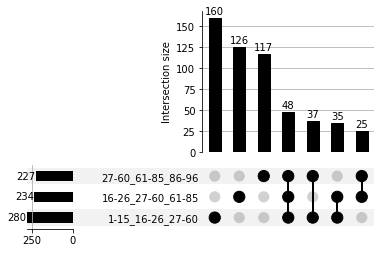

In [150]:
steiner_nodes = [[node[:-4] for node in net_stats_d2.iloc[net, 11]] for net in range(3)]

intersections = from_contents({'1-15_16-26_27-60': steiner_nodes[0], 
                               '16-26_27-60_61-85': steiner_nodes[1],
                               '27-60_61-85_86-96': steiner_nodes[2]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 5).plot()

plt.savefig(fig_dir+'intersections_steiner_10%.png')

In [151]:
# Steiner nodes included in all networks
shared_nodes = [node + '_tr0' for node in set.intersection(*map(set,steiner_nodes[:3]))]
degrees_steiner_nodes = pd.DataFrame(index = shared_nodes)

for name, net in net_dict.items():
    degrees = pd.DataFrame(net.degree(shared_nodes)).set_index(0)
    degrees.columns = [name.split("-")[2]]
    degrees_steiner_nodes = degrees_steiner_nodes.join(degrees)

shared_nodes = [node[:-4] for node in shared_nodes]
print(*shared_nodes, sep = ", ")

LRP6, CYCS, TNFRSF1A, MAP3K5, YWHAZ, TSG101, RANBP2, YAP1, TJP1, HSP90AA1, TRAF6, FKBP1A, TRADD, SKP1, APAF1, NEO1, BMP2, GJA1, SPP1, RACK1, CD8A, CD44, LCK, GNAQ, FGFR2, BMPR1A, AXIN1, ITGB1, MFAP2, DAG1, EGFR, BCL2L1, ITGA4, HRAS, TGFBR1, GRB2, ELOB, CBL, CDH1, SMAD4, POLR2B, RAF1, B2M, HSPA5, NKX2-5, AFDN, FYN, VCP


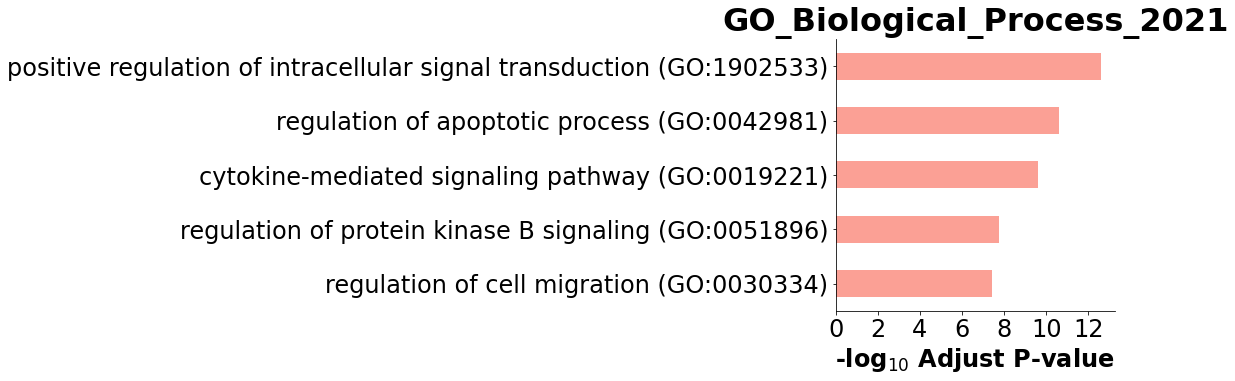

In [156]:
# GSEA on the shared Steiner nodes
enr = gseapy.enrichr(gene_list=shared_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='GO_Biological_Process_2021',
        cutoff=0.01, top_term=5, figsize=(5, 5), color='salmon')

# TF Ranking based on the number of DE targets

## Top 10 TFs per network 

In [42]:
# Ranking all TFs according to the number of targets in each network
TFs_ranking = pd.DataFrame(columns = ['TF', 'targets', 'rank', 'life_stage'])

for name, df in target_counts_d2.items():
    df = df[df.index.isin(shared_TFs)]
    df = df.sort_values(by = 'protein1_incl_targets', ascending = False)
    TFs_ranking_net = pd.DataFrame({'TF': df.index.tolist(), 
                            'targets': df.iloc[:, 0],
                            'rank': range(1, df.shape[0]+1, 1), 
                            'life_stage': name})
    TFs_ranking = pd.concat([TFs_ranking, TFs_ranking_net])

TFs_ranking = TFs_ranking.reset_index(drop = True)
TFs_ranking.head()

TFs_ranking_top10 = TFs_ranking[TFs_ranking['rank'] < 21]

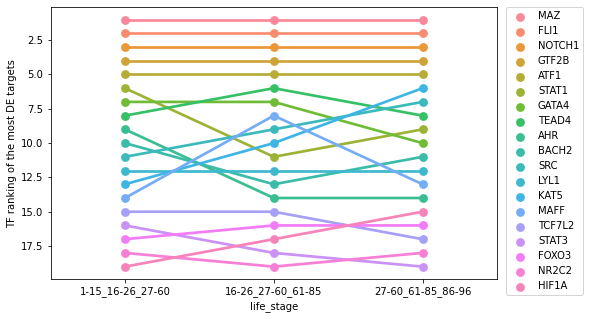

In [43]:
plt.figure(figsize = (8, 5))
sns.pointplot(data = TFs_ranking_top10, x = 'life_stage', y = 'rank', hue = 'TF')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(reversed(plt.ylim()))
plt.ylabel('TF ranking of the most DE targets')
plt.show()

In [44]:
TF_occurences = TFs_ranking_top10.groupby('TF')['life_stage'].apply(list).reset_index()
TF_occurences['n'] = [len(stages) for stages in TF_occurences['life_stage'].tolist()]

ranks = TFs_ranking.groupby('TF')['rank'].agg(['mean', 'min', 'max', 'var']).reset_index()
TF_occurences = TF_occurences.merge(ranks).sort_values(by = 'var', ascending = False).sort_values(by = 'var', ascending = False)

TF_occurences

,TF,life_stage,n,mean,min,max,var
8,KAT5,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,9.666667,6,13,12.333333
10,MAFF,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,11.666667,8,14,10.333333
0,AHR,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,12.333333,9,14,8.333333
15,STAT1,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,8.666667,6,11,6.333333
7,HIF1A,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,17.000000,15,19,4.000000
14,SRC,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,9.000000,7,11,4.000000
5,GATA4,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,8.000000,7,10,3.000000
2,BACH2,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,11.333333,10,13,2.333333
16,STAT3,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,17.666667,16,19,2.333333
18,TEAD4,"[1-15_16-26_27-60, 16-26_27-60_61-85, 27-60_61...",3,7.333333,6,8,1.333333


## TFs with greatest differences in the ranking

In [45]:
ranks['range'] = ranks['max'] - ranks['min']
ranks = ranks.sort_values(by = 'range', ascending = False)
top_TFs = ranks.iloc[0:10, 0].tolist()
ranks.head(n=10)

,TF,mean,min,max,var,range
8,KAT5,9.666667,6,13,12.333333,7
10,MAFF,11.666667,8,14,10.333333,6
0,AHR,12.333333,9,14,8.333333,5
15,STAT1,8.666667,6,11,6.333333,5
7,HIF1A,17.000000,15,19,4.000000,4
14,SRC,9.000000,7,11,4.000000,4
2,BACH2,11.333333,10,13,2.333333,3
16,STAT3,17.666667,16,19,2.333333,3
5,GATA4,8.000000,7,10,3.000000,3
17,TCF7L2,15.666667,15,17,1.333333,2


<Figure size 432x288 with 0 Axes>

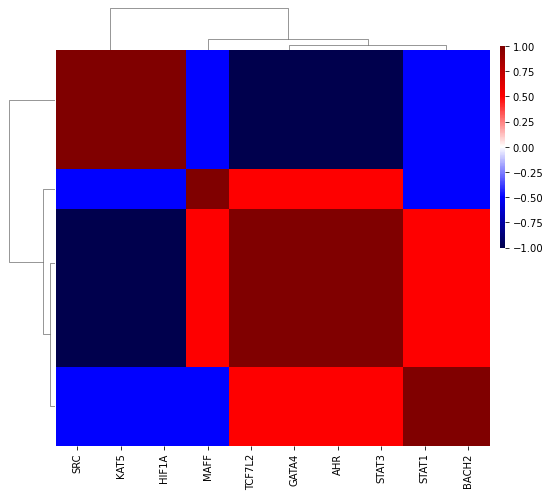

In [46]:
# Correlation heatmap
plt.figure()
sns.clustermap(corr_TFs.loc[top_TFs, top_TFs],
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=True, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap_rankingTFs.png')
plt.show()

In [47]:
# Network
tf_targets = pd.read_csv(data_dir + 'tf_data/tf-target-information.txt', sep = '\t')
tf_targets = tf_targets[['TF', 'target']].drop_duplicates()
tf_targets_sub = tf_targets[tf_targets['TF'].isin(top_TFs)]

corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.4] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']

corr_selected = corr_long.loc[corr_long['protein1'].isin(top_TFs), :]
corr_selected = corr_selected.loc[corr_selected['protein2'].isin(top_TFs), :]
corr_selected['shared_targets'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target']).intersection(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target']))), axis = 1)
corr_selected['targets_protein1'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target'])), axis = 1)
corr_selected['targets_protein2'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target'])), axis = 1)
corr_selected['percent_shared_targets'] = corr_selected['shared_targets']/corr_selected[['targets_protein1', 'targets_protein2']].min(axis=1)

# Add additional row such that the coloring is not inverted
df = {'protein1': 'SRC', 'protein2': 'SRC', 'corr': 1, 'shared_targets': 0, 'targets_protein1': 0, 'targets_protein2':0, 'percent_shared_targets':0}
corr_selected = corr_selected.append(df, ignore_index = True)

network = nx.from_pandas_edgelist(corr_selected, 'protein1', 'protein2', ['corr', 'shared_targets', 'percent_shared_targets'])
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + 'TFs_ranking.html')

PosixPath('/home/braunger/masterthesis/save/pcst/TFs_ranking.html')

# Neighborhood networks for design 2

## Shared TFs

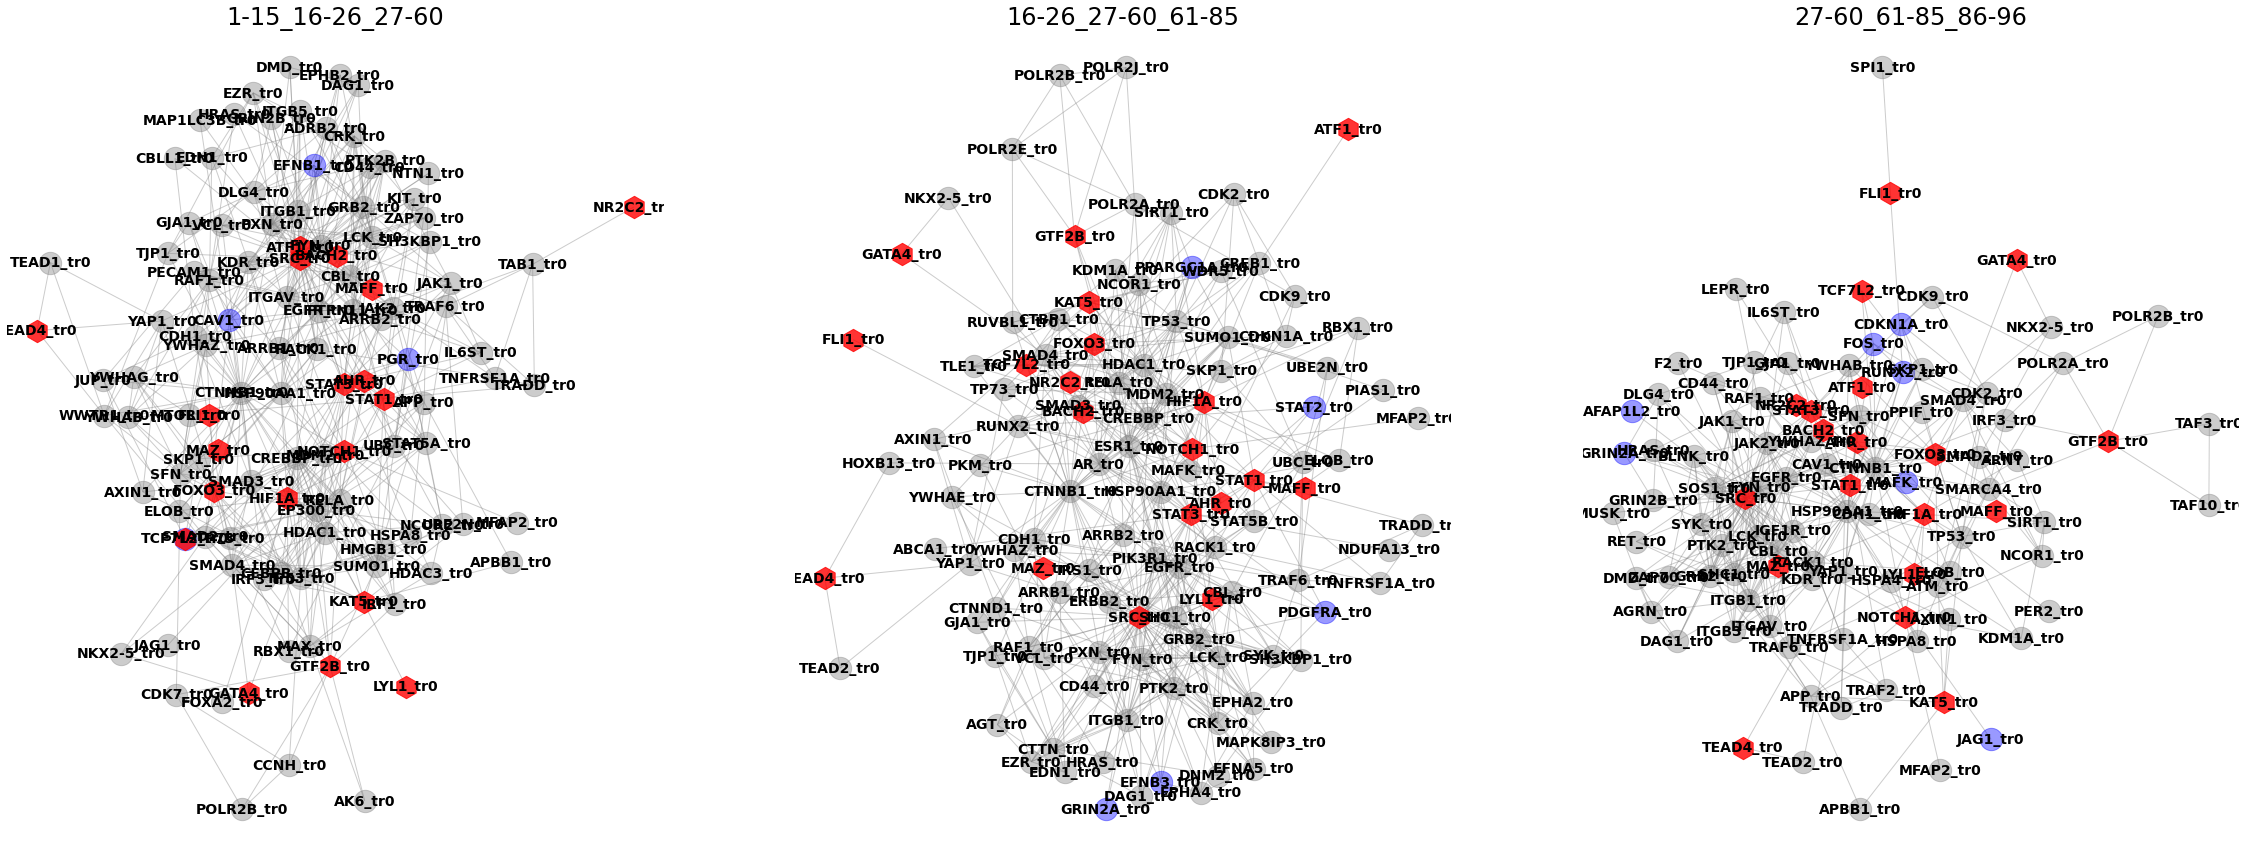

<Figure size 432x288 with 0 Axes>

In [64]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
TFs = shared_TFs_design2

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_shared_TFs.png')

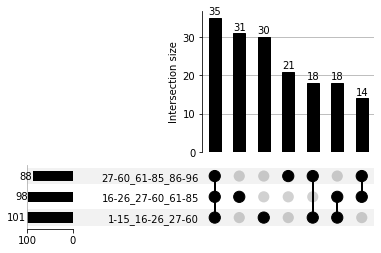

In [65]:
# How strongly do these neighborhoods overlap?
neighborhood_dict = nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_sharedTFs.png')

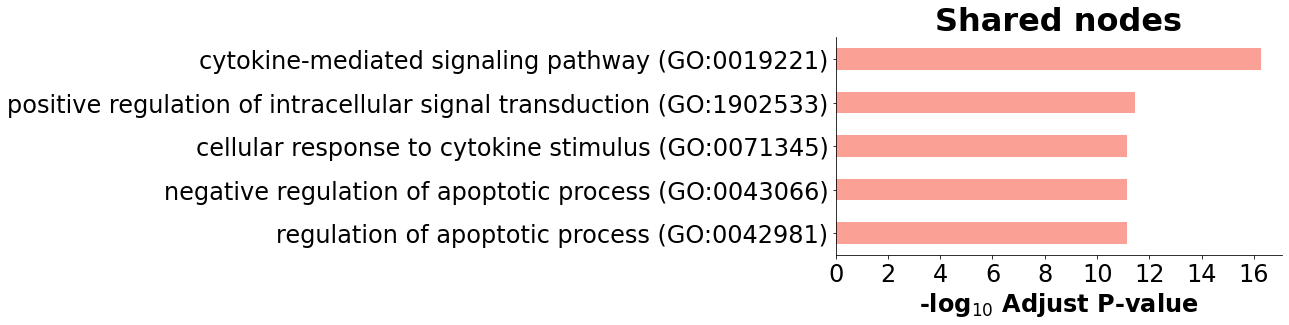

In [94]:
# GSEA for shared neighborhood nodes
shared_nodes = set(neighborhood_dict['1-15_16-26_27-60']).intersection(set(neighborhood_dict['16-26_27-60_61-85']), set(neighborhood_dict['27-60_61-85_86-96']))
enr = gseapy.enrichr(gene_list=list(shared_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Shared nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

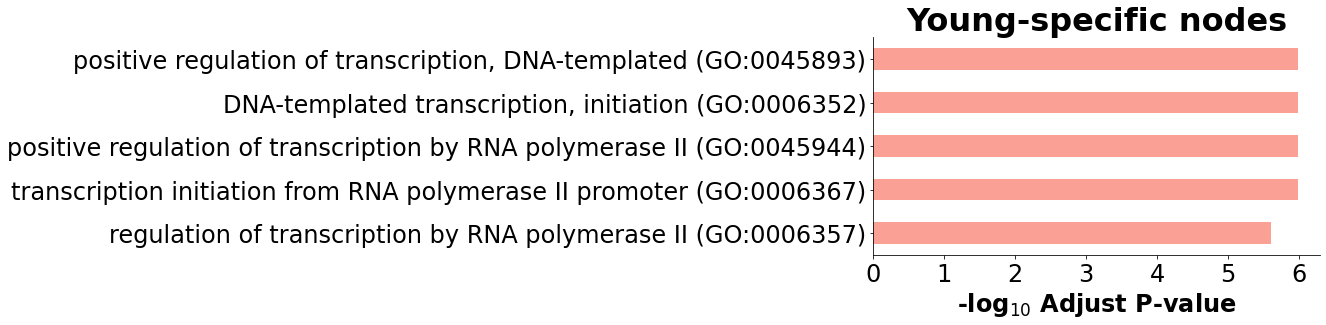

In [95]:
# GSEA for young-specific neighborhood nodes
young_nodes = set(neighborhood_dict['1-15_16-26_27-60']).difference(set(neighborhood_dict['16-26_27-60_61-85']).union(set(neighborhood_dict['27-60_61-85_86-96'])))

enr = gseapy.enrichr(gene_list=list(young_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Young-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

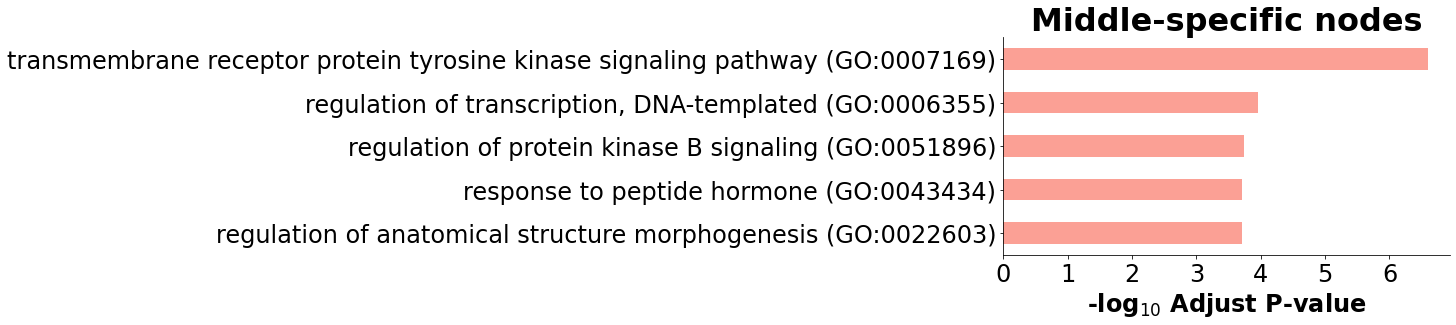

In [96]:
# GSEA for middle-specific neighborhood nodes
middle_nodes = set(neighborhood_dict['16-26_27-60_61-85']).difference(set(neighborhood_dict['1-15_16-26_27-60']).union(set(neighborhood_dict['27-60_61-85_86-96'])))

enr = gseapy.enrichr(gene_list=list(middle_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Middle-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

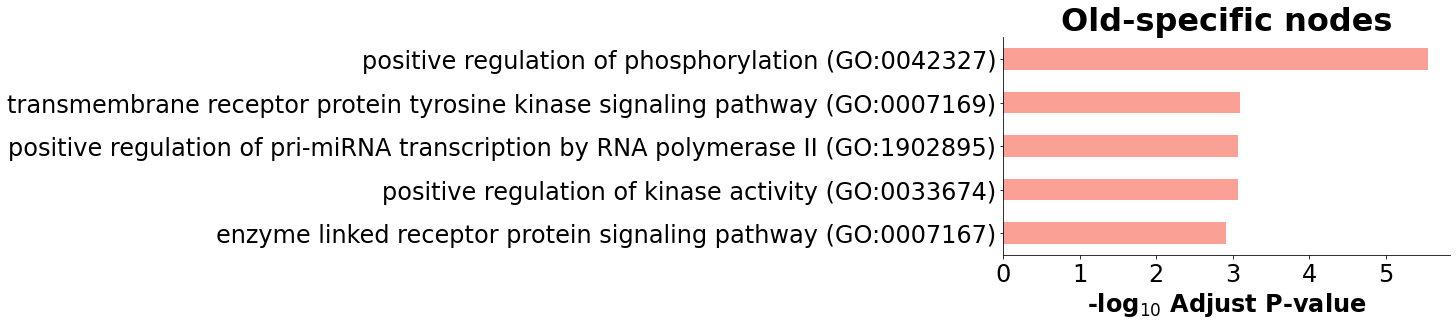

In [98]:
# GSEA for old-specific neighborhood nodes
old_nodes = set(neighborhood_dict['27-60_61-85_86-96']).difference(set(neighborhood_dict['1-15_16-26_27-60']).union(set(neighborhood_dict['16-26_27-60_61-85'])))

enr = gseapy.enrichr(gene_list=list(old_nodes), 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_neighbors', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='Old-specific nodes',
        cutoff=0.01, top_term=5, figsize=(8, 4), color='salmon')

## Young-specific TFs

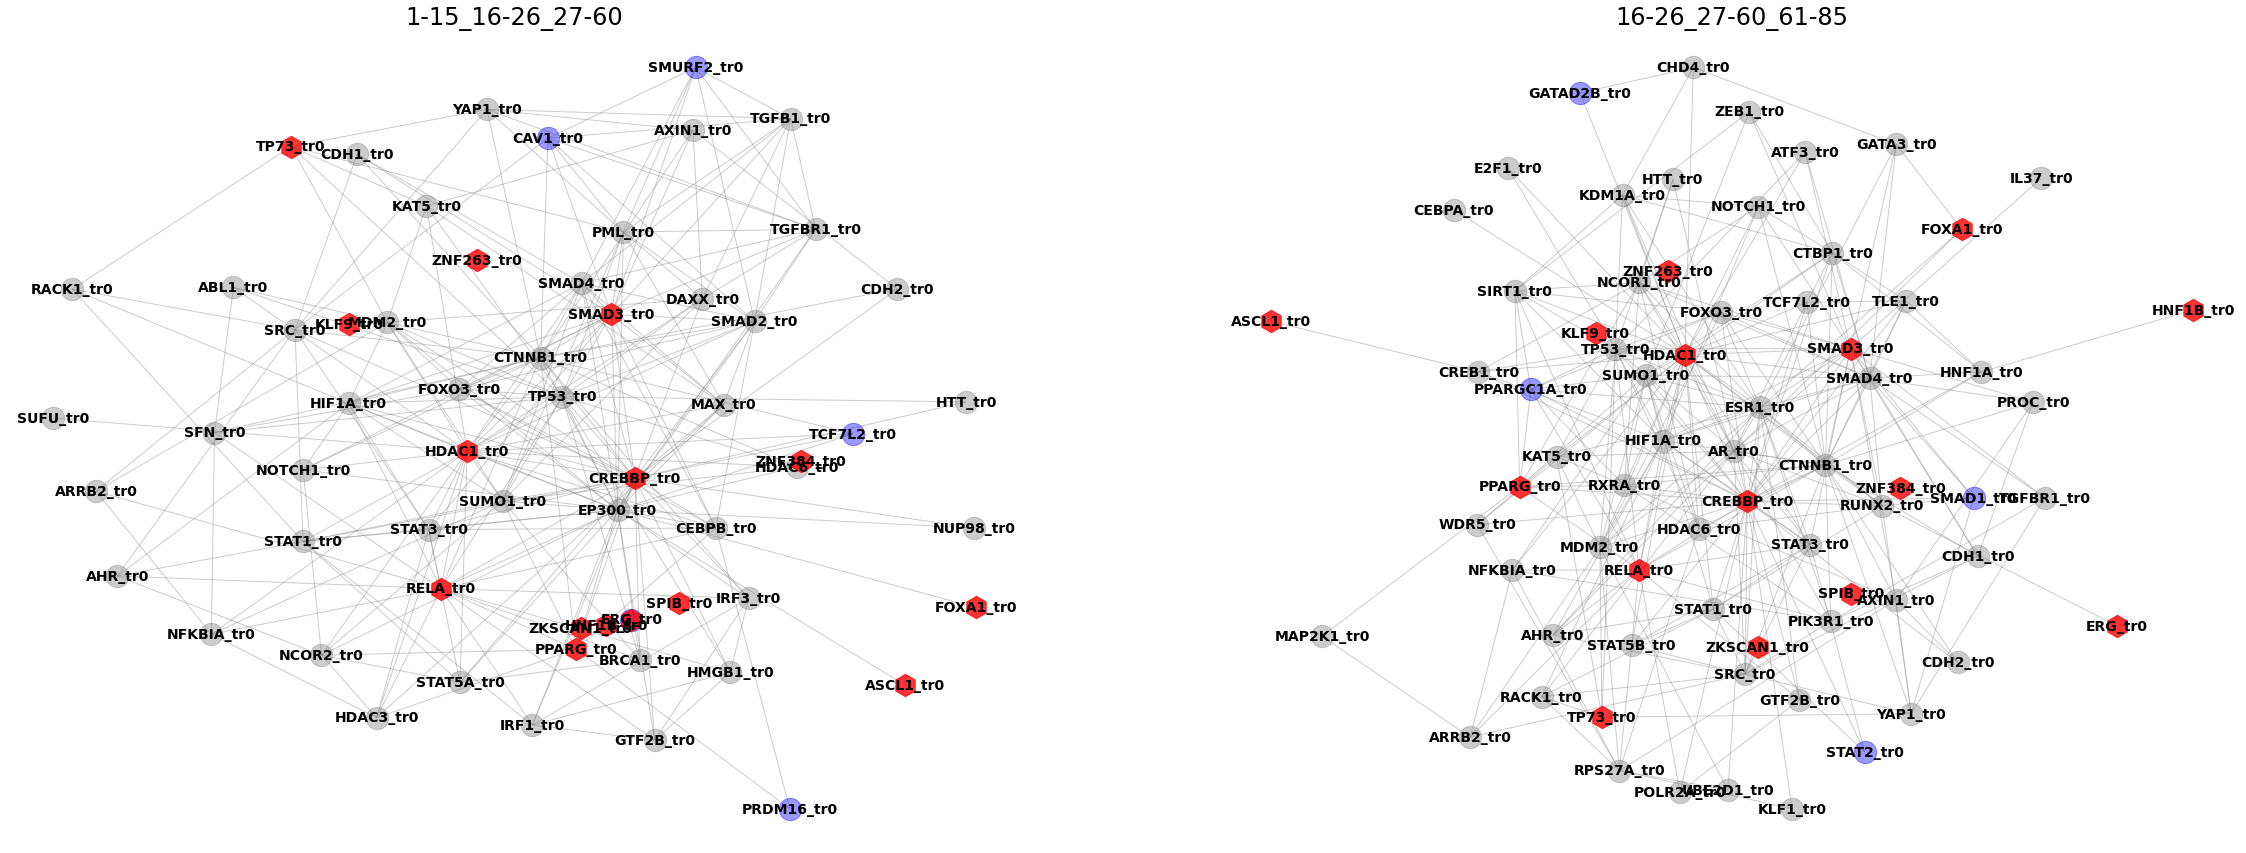

<Figure size 432x288 with 0 Axes>

In [50]:
TFs = young_specific_TFs(incl_TFs_2)
net_dict.pop('200.allTFs.27-60_61-85_86-96', None)
nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_young_TFs.png')

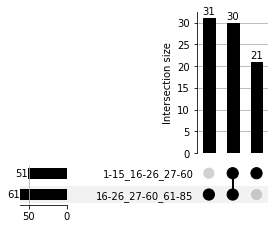

In [51]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_youngTFs.png')

## Old-specific TFs

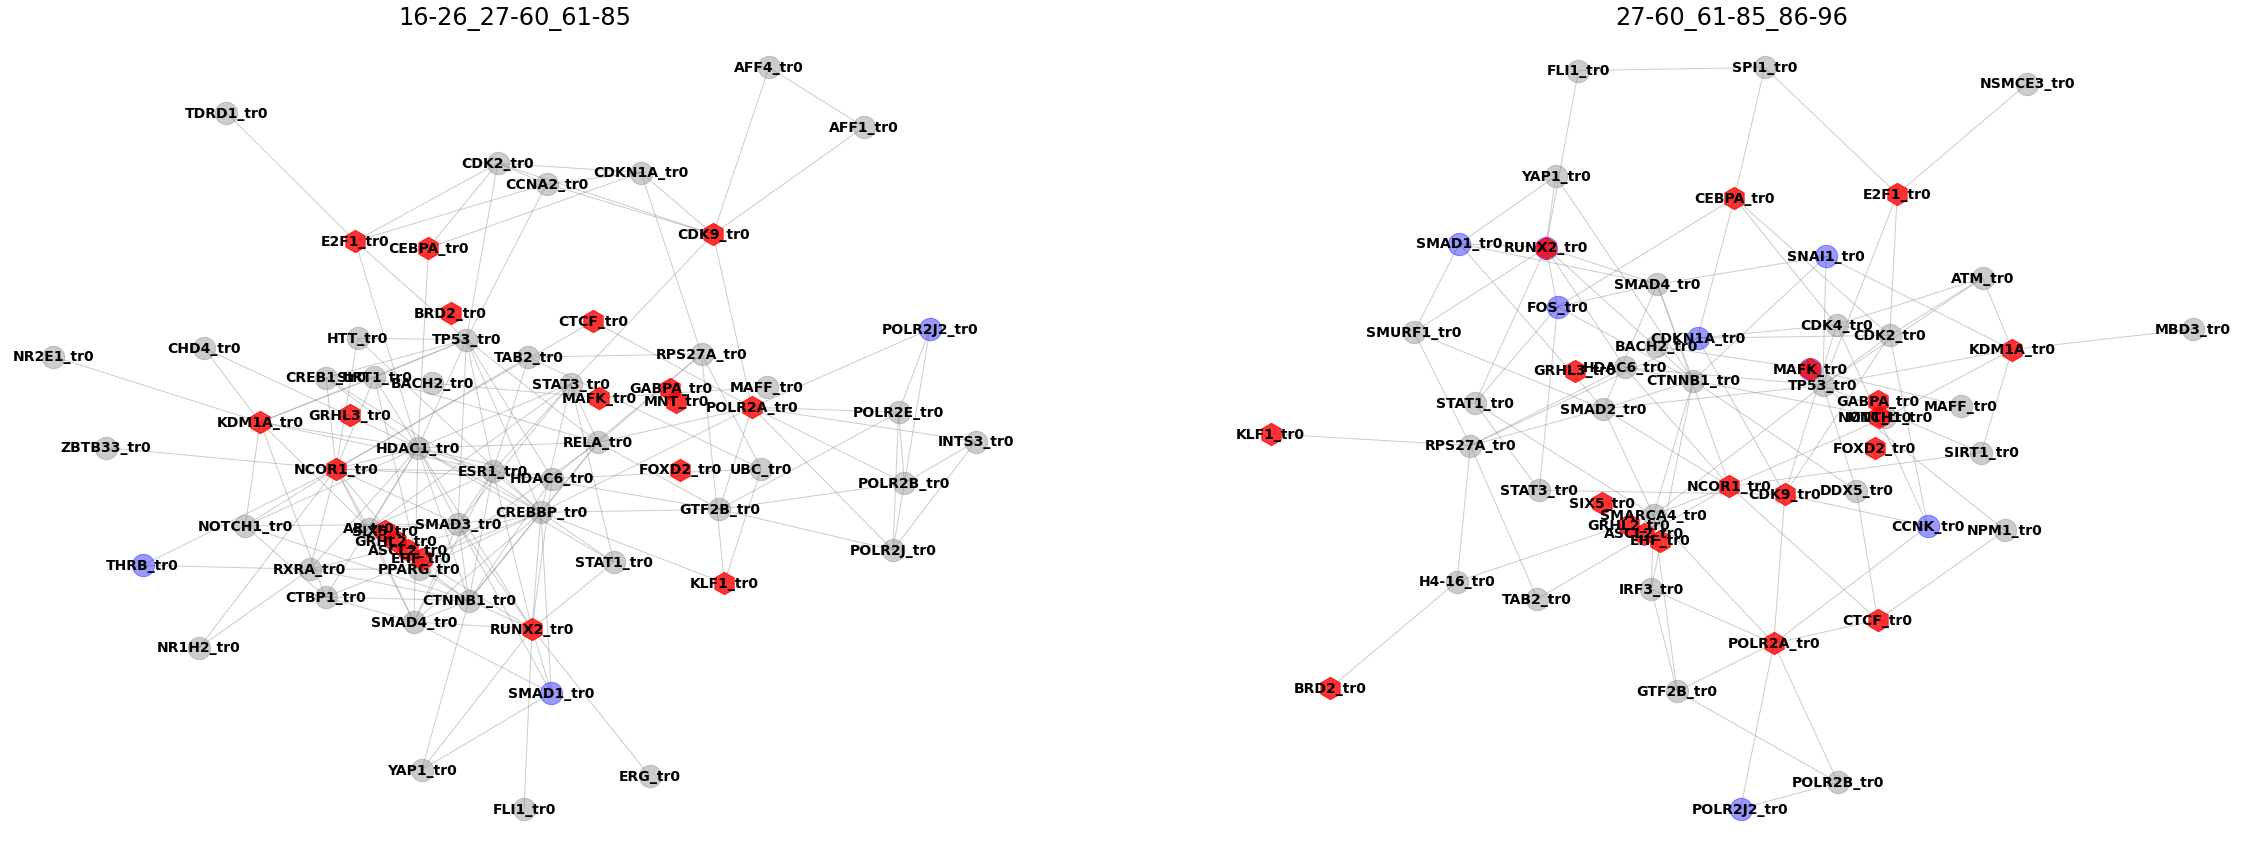

<Figure size 432x288 with 0 Axes>

In [52]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
net_dict.pop('200.allTFs.1-15_16-26_27-60', None)
TFs = old_specific_TFs(incl_TFs_2)

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_old_TFs.png')

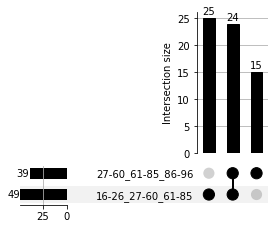

In [53]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_oldTFs.png')

# Distances inside and between TF groups

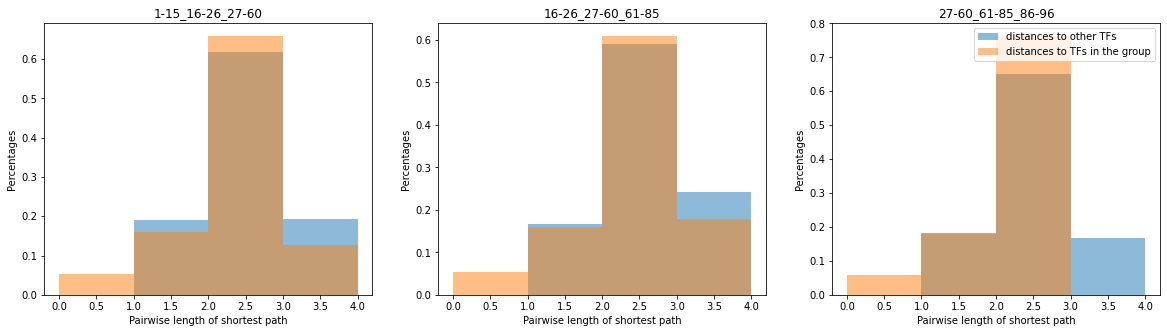

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
binwidth = 1   
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)

for (name, net), ax in zip(net_dict.items(), axs.ravel()):
    # Filter network to the nodes on the left
    right_side = [node for node in list(net.nodes()) if node.endswith('_tr1')]
    net.remove_nodes_from(right_side)

    TFs = [TF + '_tr0' for TF in shared_TFs_design2]
    all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

    group_distances = []
    other_distances = []

    for node_dict in nx.all_pairs_shortest_path_length(net):
        if node_dict[0] not in TFs:
            continue

        for key, value in node_dict[1].items():
            if key in TFs: 
                group_distances.append(value)
            elif key in all_TFs:
                other_distances.append(value)
 
    ax.hist(other_distances, weights=np.ones_like(other_distances) / len(other_distances),
             bins=np.arange(min(other_distances), max(other_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to other TFs")
    ax.hist(group_distances, weights=np.ones_like(group_distances) / len(group_distances),
             bins=np.arange(min(group_distances), max(group_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to TFs in the group")
    ax.set_xlabel("Pairwise length of shortest path")
    ax.set_ylabel("Percentages")
    plt.legend(loc='upper right')
    ax.set_title(name.split(".")[2])
    
plt.show()

## TF centrality

In [55]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "200", design = 2)
all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

TFs_ranking = pd.DataFrame(columns = ['TF', 'betweenness', 'rank', 'life_stage'])

for name, net in net_dict.items():
    name = name.split(".")[2]
    net_df = oi.get_networkx_graph_as_dataframe_of_nodes(net)
    net_df = net_df[net_df.index.isin([TF + '_tr0' for TF in shared_TFs])]
    net_df = net_df.sort_values(by = 'betweenness', ascending = False)
    TFs_ranking_net = pd.DataFrame({'TF': [TF[:-4] for TF in net_df.index.tolist()], 
                            'betweenness': net_df['betweenness'],
                            'rank': range(1, net_df.shape[0]+1, 1), 
                            'life_stage': name})
    TFs_ranking = pd.concat([TFs_ranking, TFs_ranking_net])

TFs_ranking = TFs_ranking.reset_index(drop = True)

TFs_ranking.head()

,TF,betweenness,rank,life_stage
0,NOTCH1,0.042426,1,1-15_16-26_27-60
1,SRC,0.034041,2,1-15_16-26_27-60
2,MAZ,0.032689,3,1-15_16-26_27-60
3,FLI1,0.016871,4,1-15_16-26_27-60
4,STAT1,0.010976,5,1-15_16-26_27-60


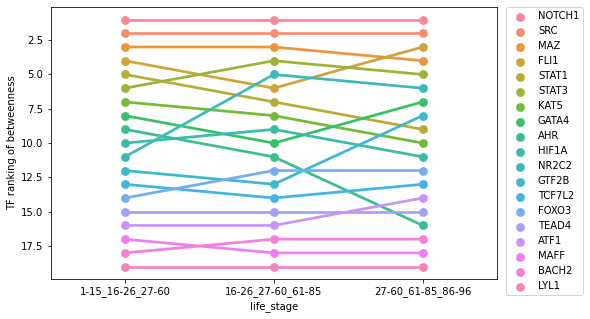

In [56]:
plt.figure(figsize = (8, 5))
sns.pointplot(data = TFs_ranking, x = 'life_stage', y = 'rank', hue = 'TF')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(reversed(plt.ylim()))
plt.ylabel('TF ranking of betweenness')
plt.show()

In [57]:
ranks = TFs_ranking.groupby('TF')['rank'].agg(['mean', 'min', 'max', 'var']).reset_index()
ranks['range'] = ranks['max'] - ranks['min']
ranks = ranks.sort_values(by = 'range', ascending = False)
ranks.head(n=7)

,TF,mean,min,max,var,range
0,AHR,12.000000,9,16,13.000000,7
13,NR2C2,7.333333,5,11,10.333333,6
6,GTF2B,11.000000,8,13,7.000000,5
15,STAT1,7.000000,5,9,4.000000,4
3,FLI1,4.333333,3,6,2.333333,3
5,GATA4,8.333333,7,10,2.333333,3
8,KAT5,8.333333,7,10,2.333333,3


## Selection of key aging TFs

In [23]:
shared_TFs_design2

{'AHR',
 'ATF1',
 'BACH2',
 'FLI1',
 'FOXO3',
 'GATA4',
 'GTF2B',
 'HIF1A',
 'KAT5',
 'LYL1',
 'MAFF',
 'MAZ',
 'NOTCH1',
 'NR2C2',
 'SRC',
 'STAT1',
 'STAT3',
 'TCF7L2',
 'TEAD4'}